# Downloading Bing Map Street View Pictures

![](https://docs.microsoft.com/en-us/bingmaps/articles/media/metadatasample.jpg)

The resolution is (1024, 256), small but enouth.

In [35]:
import requests
from PIL import Image
from io import BytesIO

In [2]:
apiKey = "AgnofOMBhhPkWbfWoS7hZ-lqafsz5tkGlf1RLsua_XLt2FAvpZOvoHXbOPts3tdm"
apiEndpoint = f"http://dev.virtualearth.net/REST/v1/Imagery/MetaData/Streetside/LAT,LON?key={apiKey}"

In [40]:
def concatImages(imgList):
    # horizontally concat 4 images
    buffer = Image.new('RGB', (imgList[0].width*4, imgList[0].height))
    buffer.paste(imgList[0], (0, 0))
    buffer.paste(imgList[1], (imgList[0].width, 0))
    buffer.paste(imgList[2], (imgList[0].width*2, 0))
    buffer.paste(imgList[3], (imgList[0].width*3, 0))
    return buffer

In [51]:
def downloadImage(lon,lat):
    point = [f"{lon:.5f}" ,f"{lat:.5f}"]

    # request metadata Api
    url = apiEndpoint.replace("LAT",point[1]).replace("LON",point[0])
    h = requests.get(url)
    responseJson = h.json()
    
    # check if it is successful
    if responseJson["authenticationResultCode"] != 'ValidCredentials':
        raise(RuntimeWarning(f"Response Code Invalid! Code: '{responseJson['authenticationResultCode']}'"))
    
    # request Image
    imageUrl = responseJson["resourceSets"][0]["resources"][0]["imageUrl"]    
    imageCropIdList = [[1,0],[0,1],[0,2],[0,3]]
    imageCropList = []
    for imageCropId in imageCropIdList:
        imageCropUrl = imageUrl.replace("{subdomain}","t0")\
                               .replace("{faceId}",f"{imageCropId[0]}")\
                               .replace("{tileId}",f"{imageCropId[1]}")
        h = requests.get(imageCropUrl)
        imageCropList.append(Image.open(BytesIO(h.content)))

    return concatImages(imageCropList)

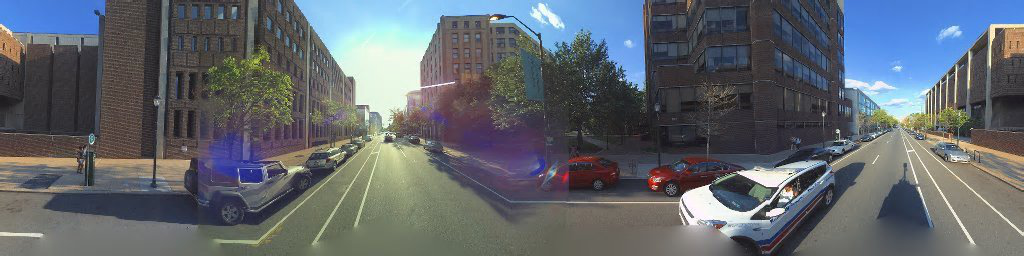

In [54]:
point = (-75.19414186477661,39.95309259902528)
img = downloadImage(*point)
img

In [49]:
img.save("test.jpg")

In [56]:
!jupyter nbconvert --to script './streetViewDownloader.ipynb'

[NbConvertApp] Converting notebook ./streetViewDownloader.ipynb to script
[NbConvertApp] Writing 1985 bytes to ./streetViewDownloader.py
